In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [2]:
good = pd.read_csv('./good.csv')
bad = pd.read_csv('./bad.csv')

dataset = pd.concat([good, bad], axis=0)
dataset

,sentence,label
0,[ NUMERO NUMERO NUMERO IDENTIF NUMERO IDENTIF ...,1
1,IDENTIF + IDENTIF * [ IDENTIF IDENTIF IDENTIF ...,1
2,[ IDENTIF ] / NUMERO / [ NUMERO NUMERO * ] + (...,1
3,[ IDENTIF NUMERO / IDENTIF * ] - IDENTIF - NUM...,1
4,IDENTIF + [ IDENTIF NUMERO IDENTIF - NUMERO NU...,1
...,...,...
9995,( IDENTIF - [ NUMERO ] ) * ( ( IDENTIF ) ) - (...,0
9996,( NUMERO - ( [ IDENTIF ] ) / NUMERO - [ NUMERO...,0
9997,[ IDENTIF IDENTIF - IDENTIF IDENTIF * NUMERO I...,0
9998,( IDENTIF + IDENTIF / [ IDENTIF ] / ( NUMERO )...,0


In [3]:
#https://medium.com/analytics-vidhya/one-hot-encoding-of-text-data-in-natural-language-processing-2242fefb2148
token_index = {}
#Create a counter for counting the number of key-value pairs in the token_length
counter = 0

# Select the elements of the samples which are the two sentences
for index, row in dataset.iterrows():
    for considered_word in row['sentence'].split():
        if considered_word not in token_index:
            
            # If the considered word is not present in the dictionary token_index, add it to the token_index
            # The index of the word in the dictionary begins from 1 
            token_index.update({considered_word : counter + 1}) 
            
            # updating the value of counter
            counter = counter + 1   

token_index

{'[': 1,
 'NUMERO': 2,
 'IDENTIF': 3,
 '/': 4,
 '+': 5,
 '*': 6,
 '-': 7,
 ']': 8,
 '(': 9,
 ')': 10}

In [4]:
def generate_onehot(size, index):
    z = [0 for x in range(size)]
    z[index] = 1
    # return np.asarray(z).astype(np.int32)
    return z

def encode_index(row, _token_index):
    return [_token_index[token] for token in row['sentence'].split()]

def encode_onehot(row, _token_index):
    length = len(_token_index)
    return [generate_onehot(length, _token_index[token]  - 1) for token in row['sentence'].split()]
    # return np.array([generate_onehot(length, _token_index[token]  - 1) for token in row['sentence'].split()])

dataset['encode_index'] = dataset.apply(lambda row: encode_index(row, token_index), axis=1)
dataset['encode'] = dataset.apply(lambda row: encode_onehot(row, token_index), axis=1)

dataset

,sentence,label,encode_index,encode
0,[ NUMERO NUMERO NUMERO IDENTIF NUMERO IDENTIF ...,1,"[1, 2, 2, 2, 3, 2, 3, 4, 4, 2, 2, 4, 2, 5, 6, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, ..."
1,IDENTIF + IDENTIF * [ IDENTIF IDENTIF IDENTIF ...,1,"[3, 5, 3, 6, 1, 3, 3, 3, 2, 2, 6, 6, 2, 2, 5, ...","[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ..."
2,[ IDENTIF ] / NUMERO / [ NUMERO NUMERO * ] + (...,1,"[1, 3, 8, 4, 2, 4, 1, 2, 2, 6, 8, 5, 9, 1, 3, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, ..."
3,[ IDENTIF NUMERO / IDENTIF * ] - IDENTIF - NUM...,1,"[1, 3, 2, 4, 3, 6, 8, 7, 3, 7, 2, 4, 1, 2, 3, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, ..."
4,IDENTIF + [ IDENTIF NUMERO IDENTIF - NUMERO NU...,1,"[3, 5, 1, 3, 2, 3, 7, 2, 2, 4, 3, 7, 3, 5, 7, ...","[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ..."
...,...,...,...,...
9995,( IDENTIF - [ NUMERO ] ) * ( ( IDENTIF ) ) - (...,0,"[9, 3, 7, 1, 2, 8, 10, 6, 9, 9, 3, 10, 10, 7, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, ..."
9996,( NUMERO - ( [ IDENTIF ] ) / NUMERO - [ NUMERO...,0,"[9, 2, 7, 9, 1, 3, 8, 10, 4, 2, 7, 1, 2, 3, 4,...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, ..."
9997,[ IDENTIF IDENTIF - IDENTIF IDENTIF * NUMERO I...,0,"[1, 3, 3, 7, 3, 3, 6, 2, 3, 3, 2, 2, 5, 4, 7, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, ..."
9998,( IDENTIF + IDENTIF / [ IDENTIF ] / ( NUMERO )...,0,"[9, 3, 5, 3, 4, 1, 3, 8, 4, 9, 2, 10, 7, 1, 3,...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, ..."


In [5]:
max_length = len(max(dataset['encode'], key=len))

In [6]:
shuffled = dataset.sample(frac=1)
shuffled

,sentence,label,encode_index,encode
6467,IDENTIF + [ NUMERO NUMERO IDENTIF * NUMERO + I...,0,"[3, 5, 1, 2, 2, 3, 6, 2, 5, 3, 7, 5, 8, 7, 2, ...","[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ..."
89,[ NUMERO ] * NUMERO -,0,"[1, 2, 8, 6, 2, 7]","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, ..."
4034,NUMERO * ( [ NUMERO ] ) / NUMERO + NUMERO,1,"[2, 6, 9, 1, 2, 8, 10, 4, 2, 5, 2]","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ..."
6825,( NUMERO ) + ],0,"[9, 2, 10, 5, 8]","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, ..."
3221,( ( [ IDENTIF NUMERO / IDENTIF IDENTIF NUMERO ...,1,"[9, 9, 1, 3, 2, 4, 3, 3, 2, 2, 3, 3, 4, 2, 4, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, ..."
...,...,...,...,...
9555,[ IDENTIF NUMERO IDENTIF - / / NUMERO + IDENTI...,0,"[1, 3, 2, 3, 7, 4, 4, 2, 5, 3, 3, 5, 5, 3, 3, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, ..."
6604,NUMERO + [ IDENTIF IDENTIF IDENTIF IDENTIF - I...,1,"[2, 5, 1, 3, 3, 3, 3, 7, 3, 7, 6, 3, 6, 3, 4, ...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ..."
1175,( * ( [ NUMERO IDENTIF / ] / NUMERO * NUMERO )...,0,"[9, 6, 9, 1, 2, 3, 4, 8, 4, 2, 6, 2, 10, 5, 3,...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, ..."
4633,IDENTIF * ( NUMERO * [ IDENTIF ] ) * IDENTIF /...,1,"[3, 6, 9, 2, 6, 1, 3, 8, 10, 6, 3, 4, 2, 6, 9,...","[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ..."


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences with zero vectors
padded_data = pad_sequences(shuffled['encode'], maxlen=max_length, padding='post')
len(padded_data[0])

98

In [8]:
# list_of_tuples = shuffled.apply(lambda row: (row['encoded'], row['label']), axis=1).tolist()
# list_of_tuples

tensor2 = tf.constant(shuffled['label'], dtype=tf.int32)

data=tf.convert_to_tensor(padded_data)
# data
ds = tf.data.Dataset.from_tensor_slices((padded_data, tensor2))

ds.element_spec
# combined = (tensor1, tensor2)
# combined

(TensorSpec(shape=(98, 10), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [9]:
ds.cardinality().numpy()

20000

In [38]:
dsb= ds
dsb

<TensorSliceDataset element_spec=(TensorSpec(shape=(98, 10), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [67]:
BATCH_SIZE = 32

length = len(shuffled)
test_ds_size = int(length * 0.2) # 20 percent of length of ds
train_ds = dsb.skip(test_ds_size).batch(BATCH_SIZE)
test_ds = dsb.take(test_ds_size).batch(BATCH_SIZE)

train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 98, 10), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [68]:
i_shape = tuple(train_ds.element_spec[0].shape)
i_shape

(None, 98, 10)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
# model.add(LSTM(units=512, return_sequences=True, input_shape=( i_shape[1], i_shape[2])))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, input_shape=(i_shape[1], i_shape[2]))),)
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(1))

model.add(Dense(units=1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', run_eagerly=True, metrics='accuracy')


In [77]:
print([layer.supports_masking for layer in model.layers])

[True, True]


In [78]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


InvalidArgumentError: Exception encountered when calling layer "forward_lstm_32" "                 f"(type LSTM).

Value for attr 'T' of int32 is not in the list of allowed values: half, float, double
	; NodeDef: {{node CudnnRNN}}; Op<name=CudnnRNN; signature=input:T, input_h:T, input_c:T, params:T -> output:T, output_h:T, output_c:T, reserve_space:T; attr=T:type,allowed=[DT_HALF, DT_FLOAT, DT_DOUBLE]; attr=rnn_mode:string,default="lstm",allowed=["rnn_relu", "rnn_tanh", "lstm", "gru"]; attr=input_mode:string,default="linear_input",allowed=["linear_input", "skip_input", "auto_select"]; attr=direction:string,default="unidirectional",allowed=["unidirectional", "bidirectional"]; attr=dropout:float,default=0; attr=seed:int,default=0; attr=seed2:int,default=0; attr=is_training:bool,default=true; is_stateful=true> [Op:CudnnRNN]

Call arguments received by layer "forward_lstm_32" "                 f"(type LSTM):
  • inputs=tf.Tensor(shape=(32, 98, 10), dtype=int32)
  • mask=None
  • training=True
  • initial_state=None

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

63/63 [==============================] - 2s 28ms/step - loss: 0.2500 - accuracy: 0.4995
Test Loss: 0.25000256299972534
Test Accuracy: 0.49949920177459717


(0.0, 0.2500986307859421)

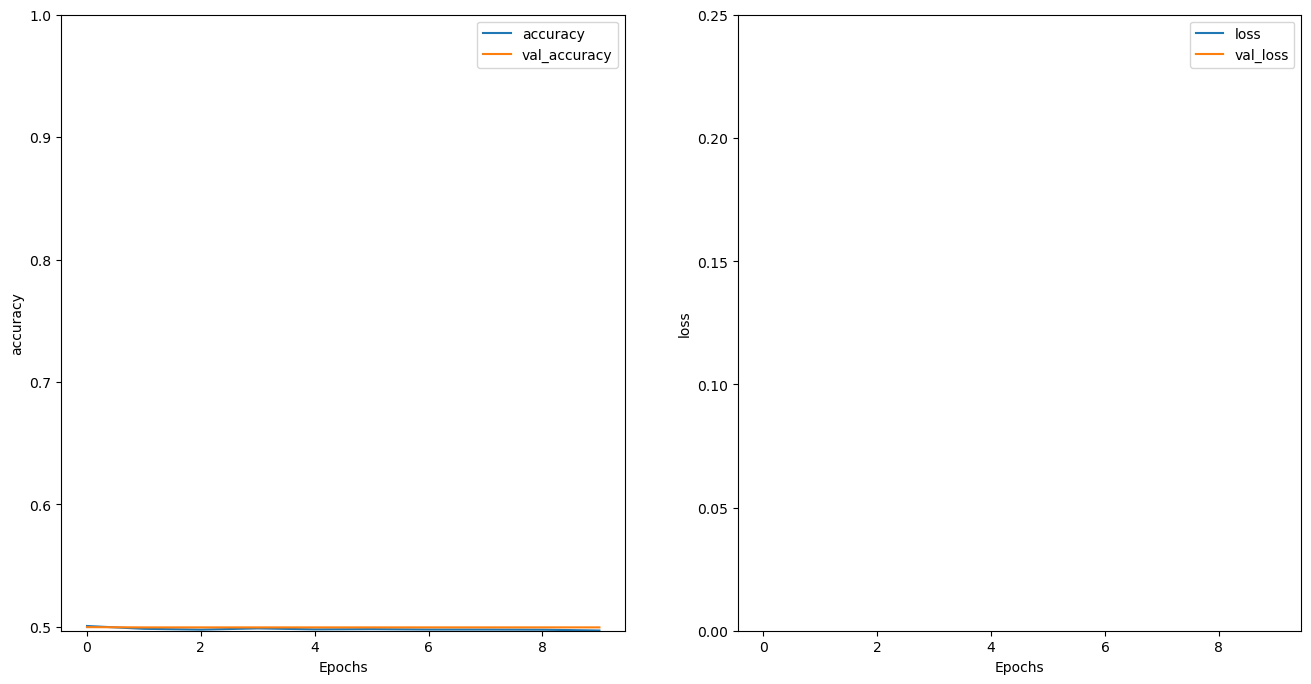

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)